## Hashing

### Hashing
* The action to transform a piece of data into a fixed size value, usually an integer value
* The piece of data can be
  + IP address
  + User name
  + Http request
  + Anything you can transform to an integer value
* Hashing algorithm
  + MD5 hashing
  + 256 hashing
  + Hashing function
* Why hashing?
  + problem of a scenario
    + Imaging a system having multiple servers, and each server has its own in-memory cache to store the results of an expensive calculation. 
    + The requests are assigned by the round Robin algorithm. 
    + The problem is that when the first request of a calculation is assigned to server A, server A stores the results in its cache. When a request of the same calculation is received by the load balancer again, the request may be directed to another server, where the results will be re-calculated by the assigned server, since the results are not cached on this server (cache miss). As a result, caching does not reduce the latency and computation.
  + solution
    + A solution using hashing: we can hash the user id and send all the requests from the same users to the same servers in load balancer. Here each user id is hashed into an unique integer value
  + implementation
    + first calculate an integer value for each user id by hashing
    + mod the integer by the number of servers in the system. The obtained results define the index of the server the requests will be directed to
    + By doing this, requests from the same users will always be processed by the same servers
   + Examples
     + if a user id is hashed to 11, and there are 5 servers, then the requests from this user will be directed to the server with the index of 11%4 = 3. 
     + User id with 12, 13, and 14 will be directed to server 0, 1, and 2. 
  + problem of this implmentation
    + if one of the servers (e.g. server A) is broken, we will update the hashing function, and requests from its users will be directed to another available server. However, since the number of the servers is now reduced by one, all the hashing mapping relationships, not only for server A, but also for other servers, are broken.
  + if we add an extra server to the system. Now the number of servers increases by one. Again, due to the change in the number of servers, all the hashing relationships are broken.
  + In both cases i and ii, we will get a cache miss using load balancer and the round Robin algorithm.
  

### Consistent Hashing
* a distributed hashing scheme independent of servers or objects, and a technique does not depend on the number of servers
  + Adding or removing servers will not affect your system
* concept of hash ring
  + all the servers are assigned on a circle, which can have infinite number of points
  + Server nodes can be placed at random locations, and the ring can have any number of servers on different locations
  + The servers are assigned to the ring by hashing functions
  + Hashing function needs to ensure the uniformity in assigned server locations so that servers are evenly distributed
* Hasing implementation
  + Hashing generates hash values for each servers between 0 and 360
  + Once the hashing value is obtained for a server, we place that server to the corresponding location/angle on the circle
  + Clients will be assigned in the same way on the circle by hashing function
* how to direct requests to server  
  + We first decide the direction (clockwise or unti-clockwise) to use in hashing function
  + In clockwise direction, requests from a client are assigned to the server nearest to it in clockwise direction
  + If a server is down, its previous clients will be mapped to the next nearest server in clockwise direction
  + If a new server is added, new clients will be mapped to it without breaking the hashing between existing clients and servers
  + If a server (e.g. server A) is more powerful than other servers, we can assign server A to multiple hash functions. 
    + Server A will have multiple hash values/ locations and we can assign more clients to server A
* In large scale system design, consistent hashing is important to accommodate the dynamics of adding server and exiting broken servers depending on the dynamics of requests in the system

### Example of assign multiple ids to each machine (using counter clockwise convention)
* assign multiple ids to each machine.
  + for example, for blue machine, assign blue1, blue-2, blue-3 and blue-4 to it
  + generate hash for each machine using 4 hashing functions
  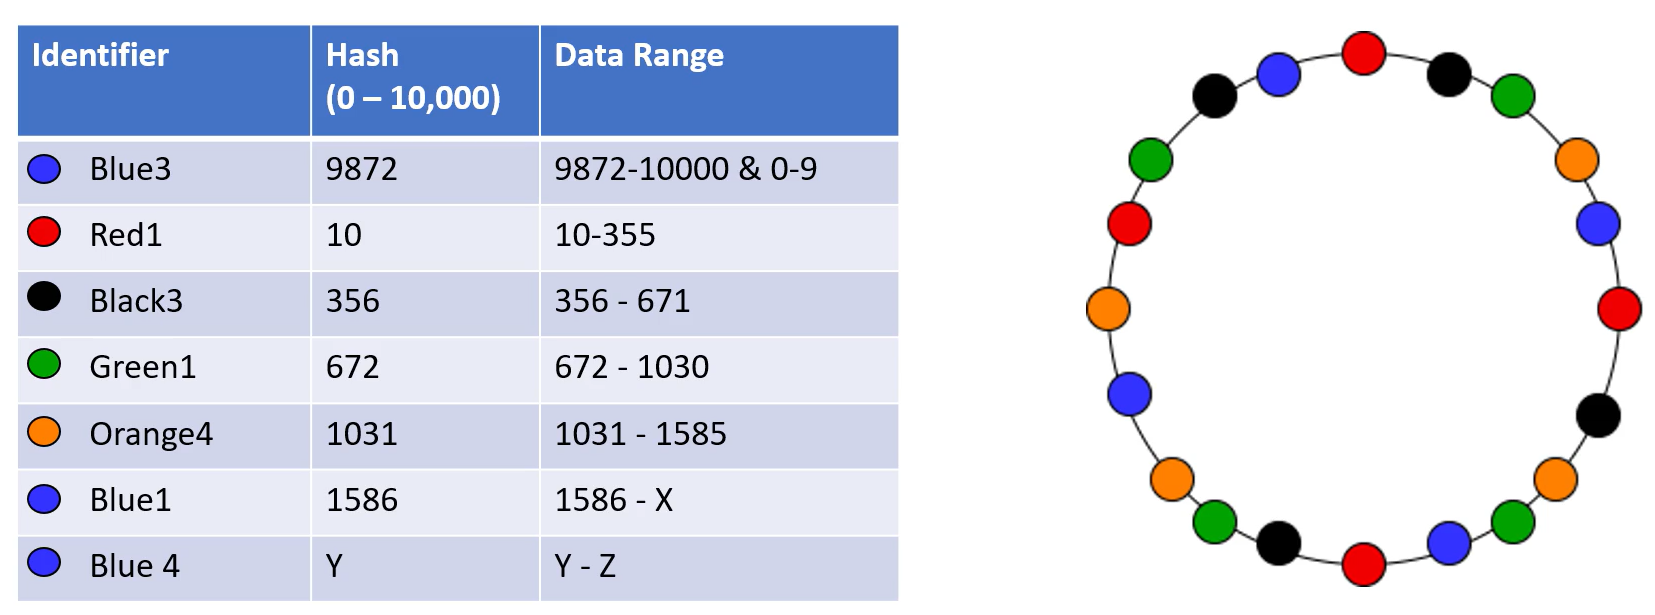
* each machine is responsible for data from itself to the right of it until the next machine
  + each machine is still responsible for the same amount of data as single id before without any machines removed or added, but will have data evenly distributed when new machines are added or removed
* using the convention of right side data responsibility, when adding or removing data, we follow a counter-clockwise convention
  + when removing a node, its data will be distributed to its first neighbor node counter-clock wise
  + when adding a node, it will get data from its first neighbor node counter-clock wise

### Notes
* Consistent hashing will not completely avoid moving data and rehashing. 
* Consistent hashing only reduces the amount of the data to move and re-mapping the hashing value
  + only the impacted data will be moved and user id will be re-directed 